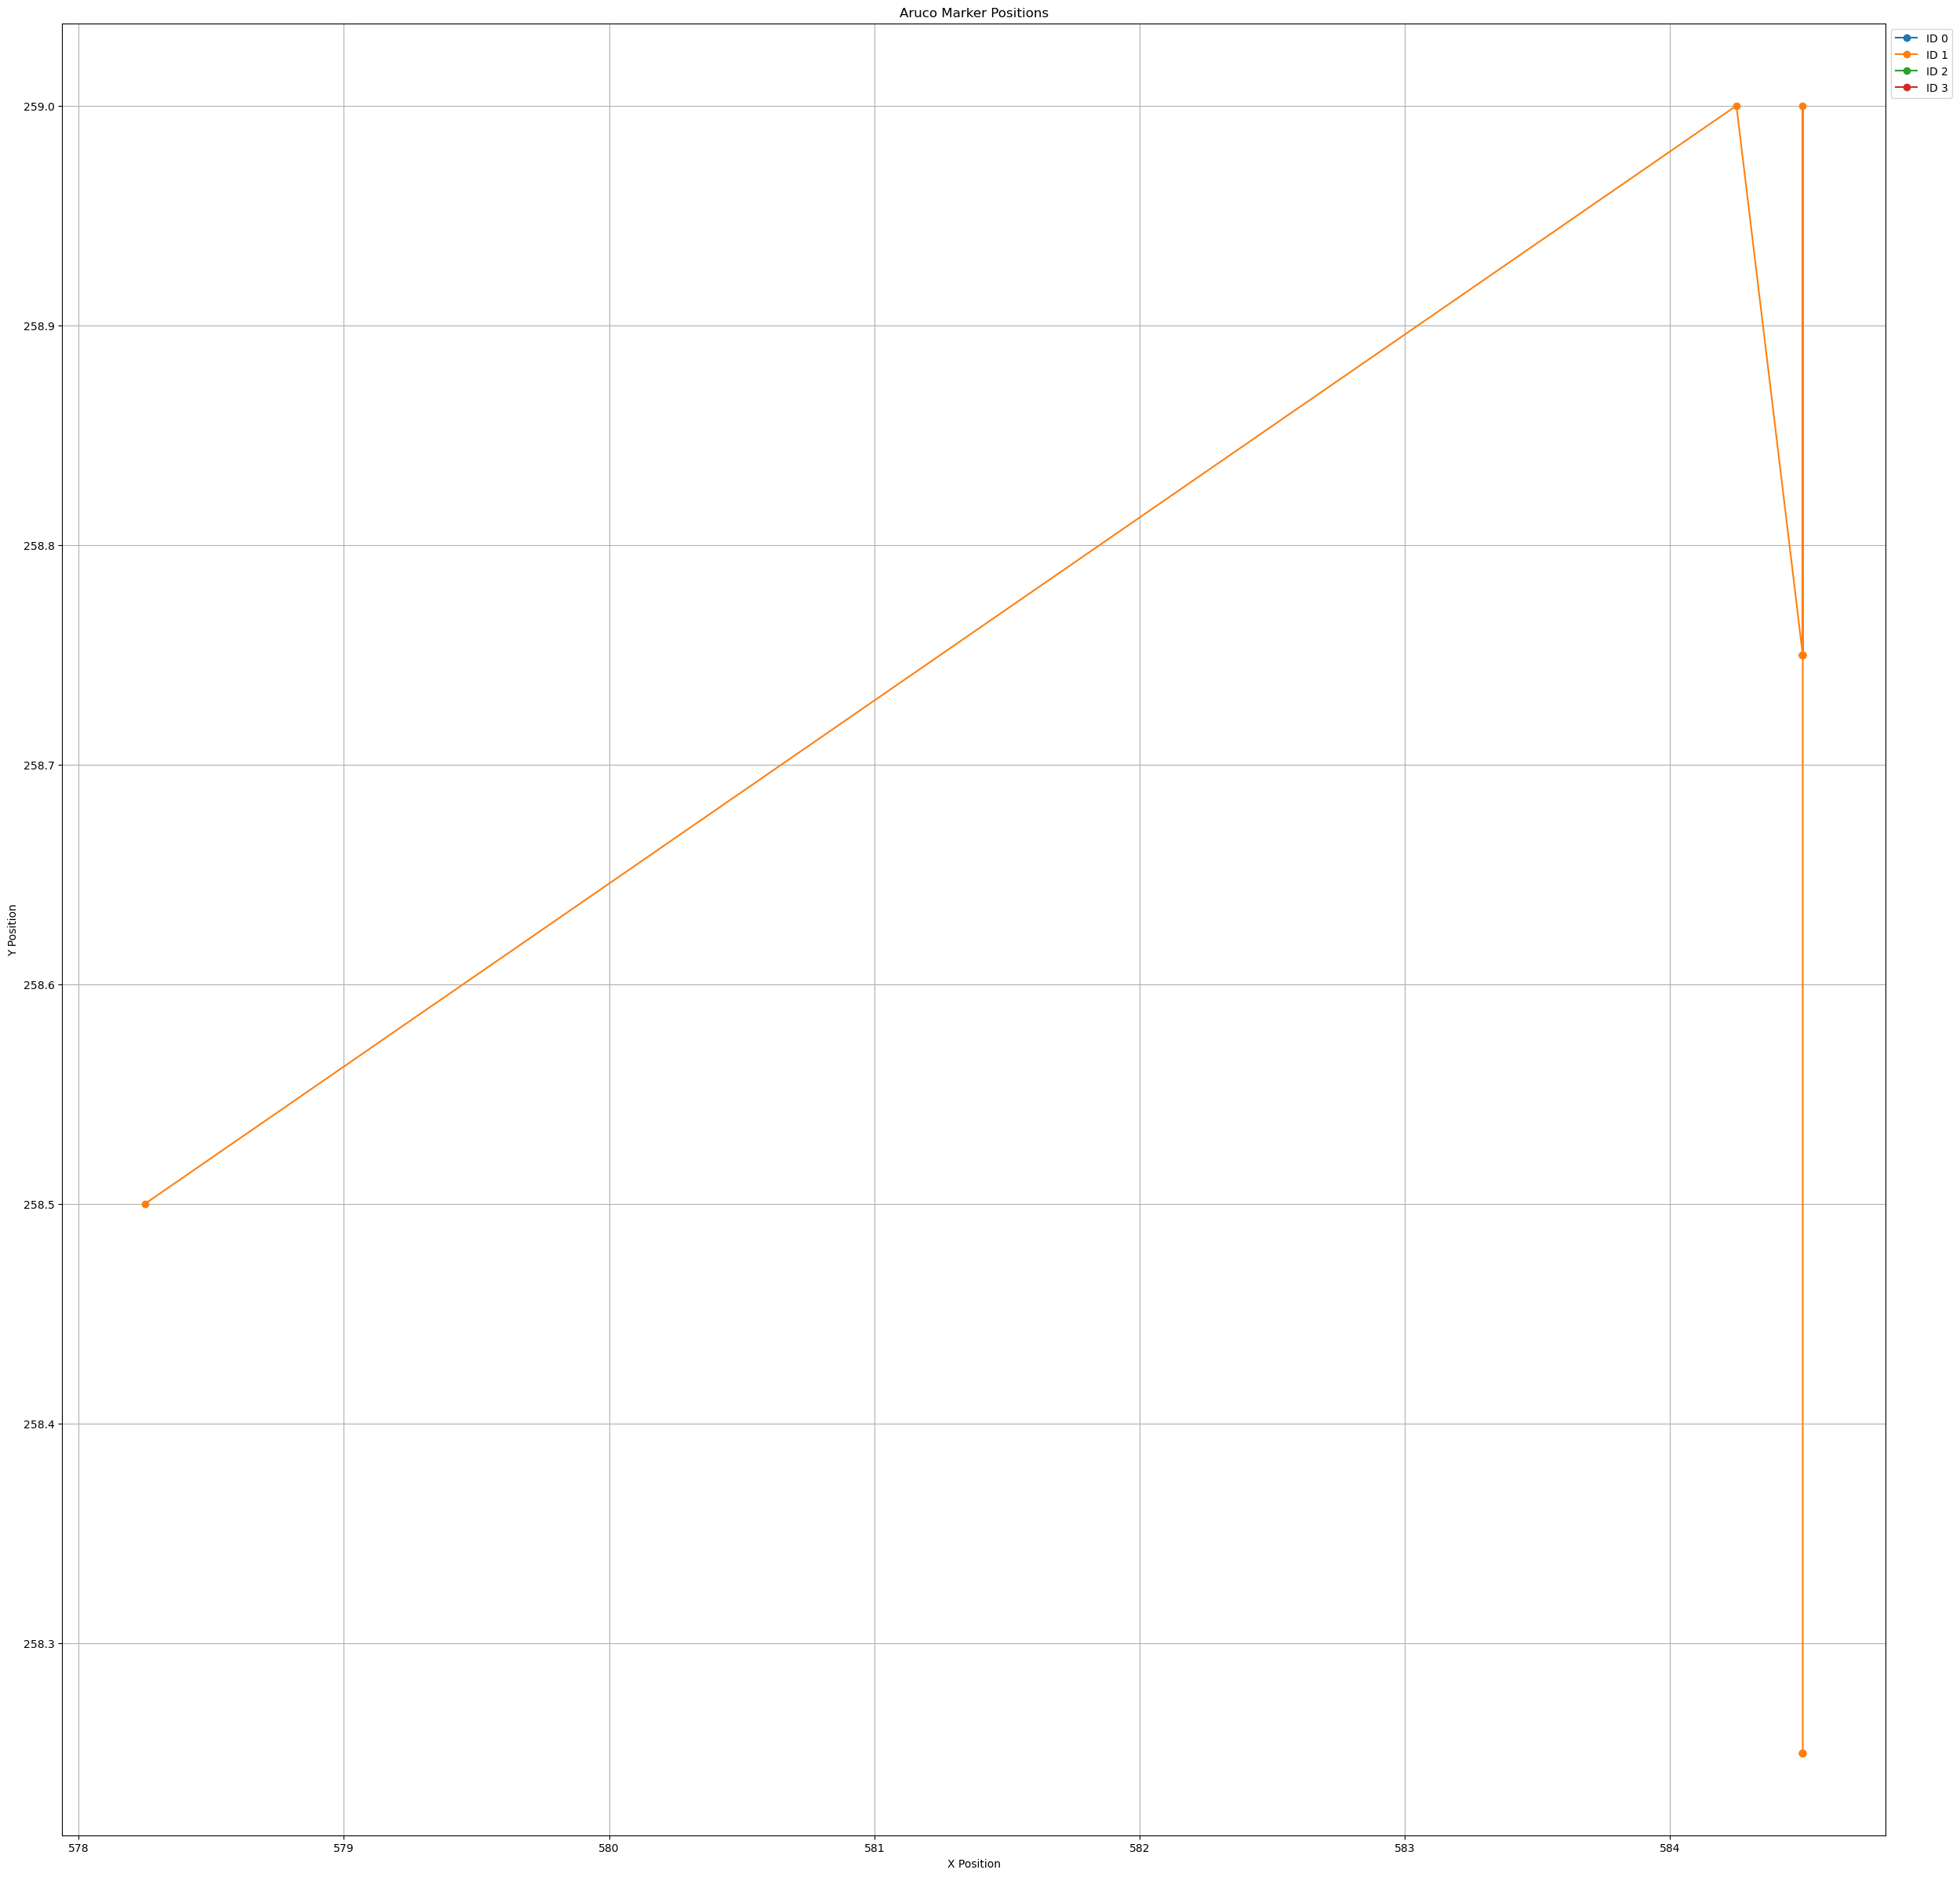

In [2]:
#code is not working right, plot is not proper
import cv2
import numpy as np
import csv
import time
import matplotlib.pyplot as plt

# Create a VideoCapture object
cap = cv2.VideoCapture(0)

# Check if the camera is opened correctly
if not cap.isOpened():
    print("Error: Unable to access the camera.")
    exit()

# Define the Aruco dictionary
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)

# Create the Aruco parameters
aruco_params = cv2.aruco.DetectorParameters_create()

# Define the range of Aruco IDs you want to track
tracked_ids = list(range(4))  # Track IDs from 0 to 10

# Initialize a dictionary to store the last updated time for each ID
last_update_times = {id_: 0 for id_ in tracked_ids}

# Initialize lists to store x and y positions of tracked IDs
x_positions = [[] for _ in range(11)]
y_positions = [[] for _ in range(11)]

# Start the loop
while True:
    # Capture the frame
    ret, frame = cap.read()

    # Check if the frame is valid
    if not ret:
        print("Error: Unable to capture frame.")
        break

    # Detect the Aruco markers in the frame
    corners, ids, _ = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=aruco_params)

    # Check if any Aruco markers were detected
    if ids is not None and len(ids) > 0:
        # Iterate over each detected marker
        for i in range(len(ids)):
            id_ = ids[i][0]

            # Check if the detected Aruco marker ID is in the list of tracked IDs
            if id_ in tracked_ids:
                # Get the x and y position of the current Aruco marker
                x_pos = corners[i][0][:, 0].mean()
                y_pos = corners[i][0][:, 1].mean()

                # Get the current time
                curr_time = time.time()

                # Check if 10 milliseconds have passed since the last update for this ID
                if curr_time - last_update_times[id_] >= 0.1:
                    # Save the position of the Aruco marker
                    x_positions[id_].append(x_pos)
                    y_positions[id_].append(y_pos)

                    # Update the last update time for this ID
                    last_update_times[id_] = curr_time

                # Draw the detected Aruco marker on the frame
                cv2.aruco.drawDetectedMarkers(frame, corners, ids)

    # Display the frame
    cv2.imshow("Frame", frame)

    # Check if the user wants to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close the window
cap.release()
cv2.destroyAllWindows()

# Create a graph to display the positions of all IDs
plt.figure(figsize=(30, 30), dpi=100)
for id_ in tracked_ids:
    plt.plot(x_positions[id_], y_positions[id_], marker='o', linestyle='-', label=f"ID {id_}")

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Aruco Marker Positions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
